In [10]:
# from scipy.stats import entropy

# from library import *

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import rc, rcParams
from matplotlib import style 

import numpy as np

In [11]:
def bar_graph(x_USA, x_China, title, labels):
    plt.style.use('ggplot')

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    fig, ax = plt.subplots()

    
    
    ax.bar(x - width/2, x_USA, width, label='USA')
    ax.bar(x + width/2, x_China, width, label='China')

    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')



    # Add some text for labels, title and custom x-axis tick labels, etc.
    major_yticks = np.arange(0, 0.7, 0.1)
    minor_yticks = np.arange(0, 0.6, 0.02)
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor = True)
    ax.set_ylabel('Frequency', color='black', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation = 45, ha="right", fontsize=15)
    ax.legend(fontsize=20)



    fig.tight_layout()
    plt.savefig('Plots/'+title+'.pdf')

    plt.show()

In [12]:
x_USA=[0.338942, 0.312236, 0.096879, 0.084522, 0.051377, 0.047863, 0.030938, 0.015216, 0.013901, 0.003580, 
      0.002064, 0.001412, 0.000921, 0.000152]
x_China=[0.525437, 0.168978, 0.142319, 0.080260, 0.050025, 0.015189, 0.010583,  0.002159, 0.001901, 0.001231, 
         0.000770, 0.000632,  0.000423, 0.000094]
labels=['Watch', 'Push','Fork', 'IssueC', 'Issues', 'PullR', 'Create', 'PullRRC', 'Delete',
       'Member', 'Gollum', 'Release', 'CommitC', 'Public']

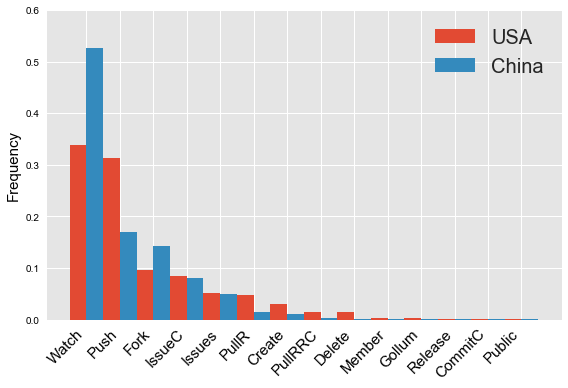

In [13]:
bar_graph(x_USA, x_China, 'event_dist_us_china', labels)

In [37]:
entropy(x_USA, x_China)

0.16487298824010713

In [39]:
#USA
x_USA=[0.472327, 0.146551, 0.127858, 0.077719, 0.072404, 0.046800, 0.023017, 0.021028, 0.005415, 
       0.003123, 0.002137, 0.001393, 0.000229]
#China
x_China=[0.299894, 0.356071, 0.169123, 0.105413, 0.032007, 0.022300, 0.004550, 0.004006,  0.001622, 0.002594, 0.001331,
        0.000891, 0.000198]
labels=['Push', 'Fork', 'IssueC', 'Issues', 'PullR', 'Create', 'PullRRC', 'Delete', 'Member', 'Gollum', 'Release',
        'CommitC', 'Public']

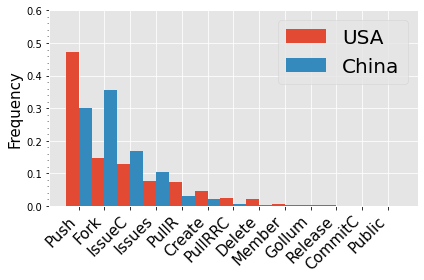

In [40]:
bar_graph(x_USA, x_China, 'event_dist_us_china_no_watch', labels)

In [27]:
entropy(x_USA, x_China)

0.19974817324232436

In [14]:
def Power_Law_plot(z, x_label, y_label, title):
    plt.style.use('ggplot')
    counts = np.array(list(z.keys()))
    freq_of_counts = np.array(list(z.values()))
    plt.scatter(np.log(counts), np.log(freq_of_counts), s=10)
    
    plt.tick_params(axis='x', colors='black')
    plt.tick_params(axis='y', colors='black')
    
    plt.xlabel(x_label, color='black', fontsize=15)
    plt.ylabel(y_label, color='black', fontsize=15)
    #plt.title(title)
    plt.savefig('Plots/'+title+'.pdf')
    plt.show();

In [15]:
with open('repo_user_dist.pickle', 'rb') as handle:
    z = pickle.load(handle)



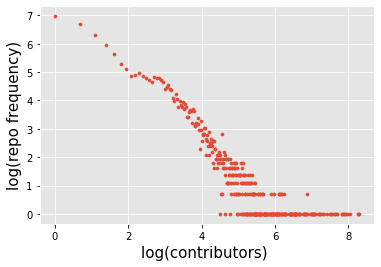

In [16]:
Power_Law_plot(z, 'log(contributors) ', 'log(repo frequency)', 'repo_user_power_law')

In [10]:
no_events=[]
f=open('repo_event_dist.txt')
for line in f:
    no_events.append (float(line.strip()))

In [11]:
len(no_events)

7290

In [12]:
def visualize_no_event_distribution(no_events, title):
    plt.style.use('ggplot')

  

    fig, ax = plt.subplots()

    sns.kdeplot(data=np.array(no_events, dtype=np.float32) , cumulative=True, vertical=False, color="blue")
    plt.plot([60, 60], [0, 0.25], 'k-', color='red', linestyle="--", linewidth=1.5)
    plt.plot([80, 80], [0, 0.50], 'k-', color='red', linestyle="--", linewidth=1.5)
    plt.plot([130, 130], [0, 0.75], 'k-', color='red', linestyle="--", linewidth=1.5)
 

    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    
    major_xticks = np.arange(0, 1000.1, 250)
    minor_xticks = np.arange(0, 1000.0, 50)
    ax.set_xticks(major_xticks)
    #ax.set_xticks(minor_xticks, minor = True)
    ax.set_xlabel('Activities per Repo', color='black', fontsize=15)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    major_yticks = np.arange(0, 1.01, 0.25)
    minor_yticks = np.arange(0, 1.0, 0.04)
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor = True)
    ax.set_ylabel('CDF', color='black', fontsize=15)
    

  


    fig.tight_layout()
    plt.savefig('Plots/'+title+'.pdf')

    plt.show()

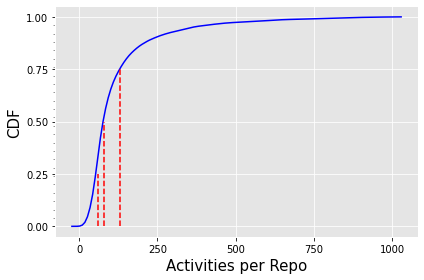

In [13]:
visualize_no_event_distribution(no_events, 'repo_events_dist')

In [25]:
def feature_distribution(dist_us, dist_china, title, x_label):
    plt.style.use('ggplot')



    fig, ax = plt.subplots()

    sns.kdeplot(data=np.array(dist_us, dtype=np.float32) , cumulative=False, vertical=False, label='USA')
    sns.kdeplot(data=np.array(dist_china, dtype=np.float32) , cumulative=False, vertical=False, label='China')


 

    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    
    #major_xticks = np.arange(0, 1000.1, 250)
    #minor_xticks = np.arange(0, 1000.0, 50)
    #ax.set_xticks(major_xticks)
    #ax.set_xticks(minor_xticks, minor = True)
    #ax.set_xlabel(x_label, color='black', fontsize=20)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    major_yticks = np.arange(0, 1.61, 0.4)
    minor_yticks = np.arange(0, 1.6, 0.04)
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor = True)
    
    #ax.set_ylabel('PDF', color='black', fontsize=20)
    
    ax.get_legend().remove()
    #ax.legend(fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
 
    

  


    fig.tight_layout()
    plt.savefig('Plots/'+title+'.pdf')

    plt.show()
    
    

In [4]:
def read_file(filename):
    x=[]
    with open(filename) as f:
        for line in f:
            x.append(float(line.strip()))
    f.close()
    return x

In [5]:
def write_file(x, filename):
    f=open(filename, 'w')
    for star in x:
        f.write(str(star))
        f.write('\n')
    f.close()

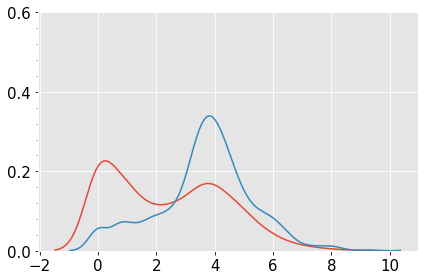

In [43]:
a=read_file('US_star_count.txt')
b=read_file('China_star_count.txt')
feature_distribution(np.log(a), np.log(b), 'star_count_dist', 'star_count')

In [106]:
# write_file(np.log(a), 'US_star_count_log.txt')
# write_file(np.log(b), 'China_star_count_log.txt')

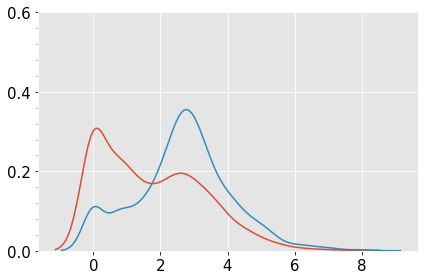

In [45]:
a=read_file('US_fork_count.txt')
b=read_file('China_fork_count.txt')
feature_distribution(np.log(a), np.log(b), 'fork_count_dist', 'fork_count')

In [108]:
# write_file(np.log(a), 'US_fork_count_log.txt')
# write_file(np.log(b), 'China_fork_count_log.txt')

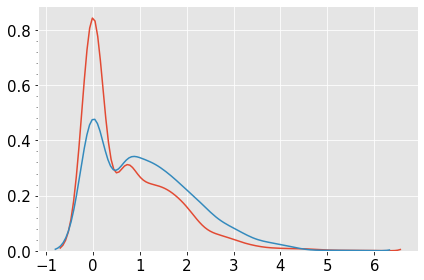

In [47]:
a=read_file('US_open_issues_count.txt')
b=read_file('China_open_issues_count.txt')
feature_distribution(np.log(a), np.log(b), 'open_issues_count', 'open_issues_count')

In [110]:
# write_file(np.log(a), 'US_open_issues_count_log.txt')
# write_file(np.log(b), 'China_open_issues_count_log.txt')

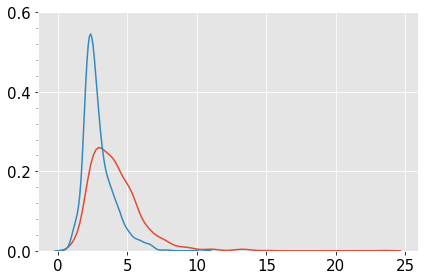

In [10]:
a=read_file('us_commit_comment.txt')
b=read_file('china_commit_comment.txt')
feature_distribution(a, b, 'comment_len_dist', 'length of comments (avg)')

In [121]:
# a=read_file('US_iat_mean.txt')
# b=read_file('China_iat_mean.txt')
# feature_distribution(a, b, 'event_iat_dist', 'Events Inter Arrival Time')

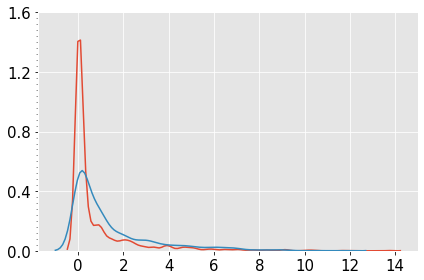

In [26]:
a=read_file('US_iat_med.txt')
b=read_file('China_iat_med.txt')
feature_distribution(a, b, 'event_iat_dist', 'Events Inter Arrival Time (med)')

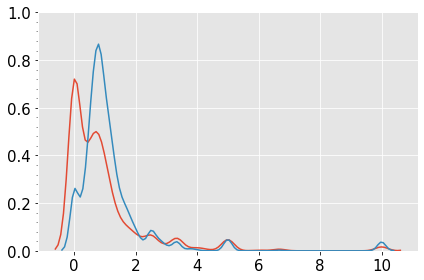

In [19]:
a=read_file('US_jaccard_dist.txt')
b=read_file('China_jaccard_dist.txt')

#normalize jaccard values
a=[x*10 for x in a]
b=[x*10 for x in b]
feature_distribution(a, b, 'jaccard', 'Jaccard watchers vs contributors')

In [112]:
# write_file(a, 'US_jaccard_dist_scaled_10.txt')
# write_file(b, 'China_jaccard_dist_scaled_10.txt')

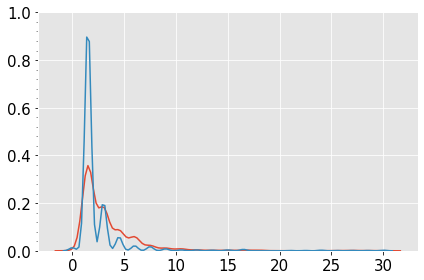

In [60]:
a=read_file('US_num_leaders_dist.txt')
b=read_file('China_num_leaders_dist.txt')

a=[x*1.5 for x in a if x<=20]
b=[x*1.5 for x in b if x<=20]

feature_distribution(a, b, 'num_leaders', 'No of Leaders per Repo')

In [114]:
# write_file(a, 'US_num_leaders_dist_scaled.txt')
# write_file(b, 'China_num_leaders_dist_scaled.txt')

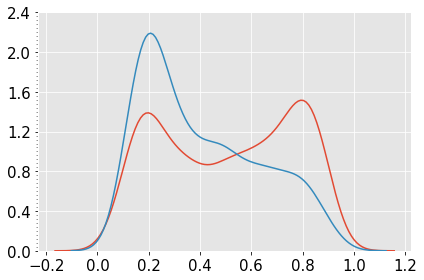

In [23]:
a=read_file('US_topic_1_dist.txt')
b=read_file('China_topic_1_dist.txt')
feature_distribution(a, b, 'topic_1_dist', '')